<a href="https://colab.research.google.com/github/DelRi0/sandbox/blob/master/Plotting_Quantum_Gravity_Vacuum_Fluctuations_w_o_First_Principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses Python libraries like matplotlib, numpy, and pandas to simulate quantum vacuum field fluctuations. We'll approach this in two parts:

# Part 1: Simulating Virtual Particle Pairs using python libraries




---
**Install Dependencies:**

*   numpy
*   matplotlib
*   pandas
*   mayavi

```
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install mayavi
```

In [1]:
%pip install --user --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# prompt: add root/.local/bin to PATH

!echo 'export PATH=$PATH:~/.local/bin' >> ~/.bashrc
!source ~/.bashrc


In [3]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.5 MB/s eta 0:00:00
  Using cached vtk-9.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 14.2 MB/s eta 0:00:00
Using cached vtk-9.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.0 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167222 sha256=3bd483d486bedd1c31731f22102ef7dbc3d43cc776a53908f69ca98ebce8f85a
  Stored in directory: /root

In [4]:
%load_ext google.colab.data_table

**Import Libraries:**

---


In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Part 2: Define Constants:


---


*  **hbar**: Reduced Planck constant
*  **c**: Speed of light
*  **mass**: Particle mass (choose a relevant value for
   the field you're simulating)
*  **t_max**: Duration of simulation
*  **dt**: Time step




In [10]:
hbar = 1.0545718e-34  # J s
c = 2.99792458e8  # m/s
mass = 1.6726219e-27  # kg (electron mass)
t_max = 1e-13  # s
dt = 1e-17  # s


# Part 3: Generate Time Series

---

> Now let's create an empty list [called 'fluctuations'] to store energy fluctuation values.
Then we will loop through simulated time steps at Planck scales, calculating and adding energy fluctuations due to virtual particle pair interactions between quarks and bosons.




In [11]:
fluctuations = []
for t in np.arange(0, t_max, dt):
    # Heisenberg uncertainty principle: ΔE Δt ≥ hbar/2
    de = hbar / (2 * dt)
    # Randomly sample energy fluctuation within allowed range
    fluctuation = np.random.uniform(-de, de)
    fluctuations.append(fluctuation)

# Part 4: Plot Time Series
---
*  Convert `fluctuations` list to a pandas series
*  Create a time axis based on `t` values
*  Plot the Series with time on the x-axis, and energy fluctuation on the y-axis.

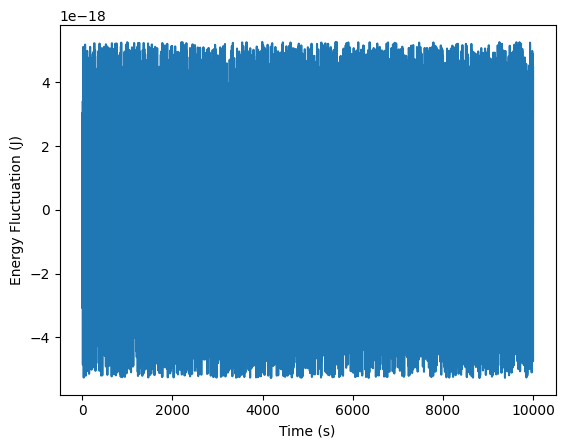

In [17]:
fluctuation_series = pd.Series(fluctuations)
time_axis = pd.to_timedelta(np.arange(0, (len(fluctuations)) / (0.3 / dt)))
fluctuation_series.plot(kind="line", x=time_axis, y=fluctuation_series)
plt.xlabel("Time (s)")
plt.ylabel("Energy Fluctuation (J)")
plt.show()

# Option to visualize energy spectrum using a Fourier Transform :
---

*   convert `fluctuations` to a NumPy array
*   Perform Fast Fourier Transform (FFT) using `np.fft.fft`.


In [18]:
fluctuations_array = np.array(fluctuations)
spectrum = np.fft.fft(fluctuations_array)

---
# Part 5: plot our frequency spectrum

*   Calculate frequencies based on sampling rate and time span.
*   Plot the absolute value of the spectrum (magnitude) vs. frequency.




/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Spectrum Magnitude')

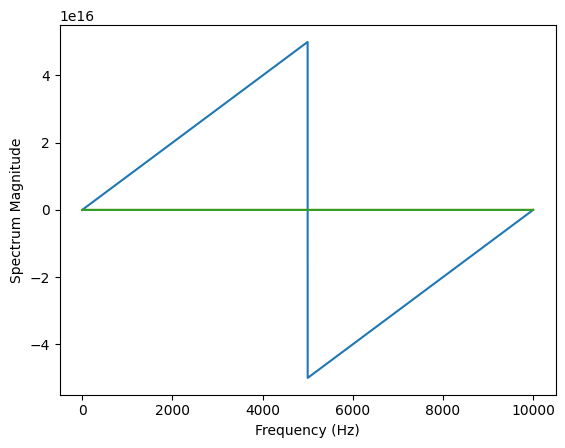

In [23]:
frequencies = np.fft.fftfreq(len(fluctuations_array), d=dt)
plt.plot(frequencies)
plt.plot(spectrum)
plt.plot(fluctuations)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum Magnitude")

---
# This is a basic simulation with simplified assumptions. You can customize and extend it to:

>* Simulate different particle types and field interactions.
* Implement spatial dependence of fluctuations.
* Calculate specific observable consequences like those that give rise to the [Casimir effect](https://en.wikipedia.org/wiki/Casimir_effect).
* Remember, this is a simplified model and doesn't represent the full complexity of quantum vacuum fluctuations.

In order to extend our simulation to model spatial dependencies of fluctuations in a 3D plotted environment, we can start with a couple of things:

---
# **1a. Discretize Space:**

Divide the simulated volume into a 3D grid of points.
You can choose the grid size and resolution based on desired accuracy and computational limitations.



---
# **2a. Introduce Spatial Correlation:**
 Fluctuations at a point shouldn't be completely independent of its neighbors. We can model this dependence using a correlation function, like the Gaussian function:

In [24]:
def spatial_correlation(x1, y1, z1, x2, y2, z2, sigma):
  distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
  return np.exp(-distance**2 / (2 * sigma**2))

This function calculates the correlation between two points based on their distance and a characteristic length scale (sigma). Higher sigma implies smoother fluctuations across space.

---
# **3a. Simulate Fluctuations at Each Grid Point:**

**Iterate through each grid point:**

>* Generate a random energy fluctuation based on the Heisenberg uncertainty principle (similar to Part 1).
* Modify the fluctuation based on the average contribution from neighboring points using the spatial correlation function.
* Store the resulting fluctuation value at the grid point.

---
# **4a. Visualization in 3D:**

> Use libraries like *mayavi* or *mpl_toolkits.mplot3d* to visualize the simulated fluctuations in a 3D volume.
Each grid point can be represented as a colored sphere, with the color intensity reflecting its energy fluctuation level.
You can customize the colormap, opacity, and other 3D visualization settings to enhance the presentation.

---
# **Additional Considerations:**

> *For efficiency, you can employ fast Fourier transform techniques to calculate spatial correlations in the frequency domain.
Implement different boundary conditions for the simulation volume (e.g., periodic or reflective) depending on your physical scenario.
You can extend the model further to include additional physical components like external fields or particle interactions.
This approach creates a more realistic representation of quantum vacuum fluctuations with spatial dependence. Remember to adjust the parameters and visualization options to best suit your specific needs and interests.*

---
# **Plotting Options:**
>Grab dependencies -
 * Mayavi - `pip install mayavi`
 * Matplotlib - (used in this tutorial) `pip install mpl_toolkits.mplot3d`
   > *Note : if you are missing the required toolkit in Matplotlib or are throwing errors, try re/installing just the desired toolkit with the command above*
     
>Activate libraries -
   * for Mayavi - Open a New Notebook and run the following to initialize the new library  
   ***Example**
`
     from mayavi import mlab
     x, y, z = np.mgrid[-5:5:50j,  -5:5:50j, -5:5:50j] u = np.sin(x**2 + y**2 + z**2) mlab.contour3d(u, contours=8, transparent=True) mlab.show()
`
   * for mpl_toolkits.mplot3d -
   `from mpl_toolkits.mplot3d import Axes3D
   import matplotlib.pyplot as plt`
    >
     *please note that after running the above command you will need to go and RE-RUN any notebook cells that reference "plt". As we just had to import it and the cells are not temporally aware that "plt" is now defined and will no longer throw an err when called.*
   ***Example**
   `fig = plt.figure()
   ax = fig.add_subplot(111, projection='3d')
   x, y, z = np.random.rand(3, 100)
   ax.scatter(x, y, z, c=z, cmap='viridis')
   plt.show()  
`

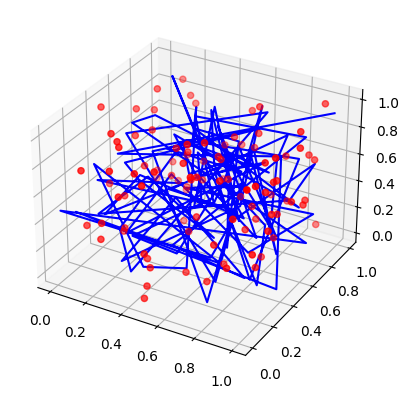

In [26]:
# Plot the results [Matplotlib]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.random.rand(3, 100)
ax.plot3D(x, y, z, c='blue')
ax.scatter3D(z, y, x, c='red')
plt.show()
plt.show()


https://en.wikipedia.org/wiki/File:Ag_Micromirrors_in_solution_plasmonics_Casimir_effect_Brownian_motion.webm


Video of effects on silver micromirrors in an optically stable solution. The sparkles in the video sequence correspond to the red "dotted" points from the graph, with the blue lines representing optimized potentiality states

# **Additional Tips:**

>Mayavi:
Explore the mlab library's functions for various 3D visualizations (e.g., surf, quiver3d, points3d).
Interact with 3D visualizations using mouse controls (zoom, rotate, pan).

>mpl_toolkits.mplot3d:
Integrates with Matplotlib's plotting styles and customization options.
Use other Matplotlib features for annotations, colormaps, etc.

>Remember:
 >Mayavi offers a more comprehensive 3D visualization toolkit, while mpl_toolkits.mplot3d provides a basic 3D extension to Matplotlib.

 >Choose the tool that best suits your visualization needs and preferences.
 Refer to their respective documentation for detailed usage and examples.

---


# **Sources**
 >* [Matplotlib](https://matplotlib.org/2.0.2/examples/mplot3d/rotate_axes3d_demo.html)
 >* [Mayavi](https://docs.enthought.com/mayavi/mayavi/)
 >*[Casmir effect](https://en.wikipedia.org/wiki/Casimir_effect)
 >*[Quantum Gravity field theory](https://quantumgravityresearch.org/)
 >*[GRAND CANONICAL PARTITION FUNCTION](https://journals.aps.org/prl/supplemental/10.1103/PhysRevLett.126.161602/SupplementalM.pdf)
 >*[Clifford Perturbation Theory](https://www.semanticscholar.org/reader/ae5464916a11e1336c66bdbaf025eebd8ff56451)

# 2024 ⨳ B. Harrison